In [1]:
import datetime as dt
import locale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [3]:
summary = pd.read_csv('data/atussum_2014.dat')

In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 11591
Columns: 409 entries, tucaseid to t500107
dtypes: float64(1), int64(408)
memory usage: 36.3 MB


In [5]:
summary.keys()

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181601', 't181699', 't181801', 't181899', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=409)

May want to rename columns

* TUFINLWGT = statistical weight of respondent
* TRYHHCHILD = age of youngest child in household
* TEAGE - age of child
* TESEX - sex of child
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

Lookup in atusintcodebk

In [6]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,-1,-1,2,-1,2,1,-1,1,1,-1,1,0,-1,150,1145,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
len(summary.tucaseid.unique())

11592

In [8]:
# Households 
summary[summary.TRCHILDNUM == 0].head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,780,0,60,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
activity = pd.read_csv('data/atusact_2014.dat')

In [10]:
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,-1,0,540,540,1,0,0,97,540,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,-1,0,30,30,1,0,0,0,570,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,-1,60,60,60,1,0,0,0,630,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,-1,10,10,10,1,0,0,0,640,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,-1,30,30,30,1,0,0,0,670,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [11]:
summary = summary.rename(columns={'tucaseid': 'TUCASEID'})
summary.head(2)

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,-1,-1,2,-1,2,1,-1,1,1,-1,1,0,-1,150,1145,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [12]:
merged = pd.merge(summary, activity)

In [13]:
len(merged[merged.TRCHILDNUM == 0])

122348

In [14]:
merged[merged.TUCASEID == 20140101140007][['TEAGE']]

,TEAGE
0,20
1,20
2,20
3,20
4,20
5,20
6,20
7,20
8,20
9,20


In [15]:
# Mean number of minutes spent doing laundry for those who did laundry
laundry_mean = merged[merged.t020102 > 0][['t020102']].mean()
laundry_mean[0]

61.058456979316787

49267


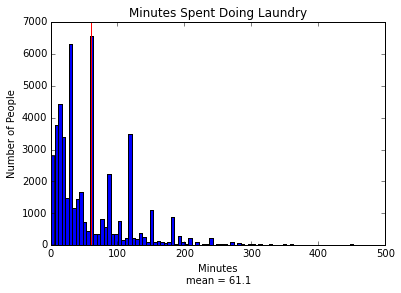

In [16]:
print(len(merged[merged.t020102 > 0]['t020102']))
merged[merged.t020102 > 0]['t020102'].plot(kind='hist', bins=90, title='Minutes Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_mean[0]))
plt.ylabel('Number of People')
ymin, ymax = plt.ylim()
plt.vlines(laundry_mean, 0, ymax, color='red')
plt.show()

In [17]:
# Number of people who watched motorsports
len(merged[merged.t130226 > 0]['t130226'])

22

In [18]:
merged[merged.t130226 > 0]

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
38742,20140301141847,12568332.334178,5,33,1,38,1,1,1,1,2,1,2,-1,3,-1,44000,1,-1,40,7,0,-1,0,620,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [19]:
resp = pd.read_csv('data/atusresp_2014.dat', parse_dates=['TUDIARYDATE'])
resp[['TUDIARYDATE']].head()

,TUDIARYDATE
0,2014-01-26
1,2014-01-30
2,2014-01-27
3,2014-01-26
4,2014-01-29


In [55]:
f1dates = resp[(resp['TUDIARYDATE'] ==  dt.date(2014, 3, 16)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 3, 30)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 11)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 25)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 8))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 22)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 27)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 8, 24)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 7))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 21)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 5)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 12))| \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 2)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 9)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 23))]

In [57]:
# Narrow down to just a certain date range (for example, F1 season)
f1dates.sort(columns=['TUDIARYDATE'])

1071